# Clone Project Folder From GitHub

In [1]:
!git clone https://github.com/data-analytics-professionals/tweet-classification.git

fatal: destination path 'tweet-classification' already exists and is not an empty directory.


# Install Required Libraries

In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-2_li2k1m
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-2_li2k1m
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=2192803c6088908965cdb171749ab5ce82acd54520b609b434a27774f12ecbc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-6hn7risc/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


# Load All Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess_kgptalkie as kgp

In [4]:
# Set seaborn settings
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_theme(context='notebook', style='dark', palette='bright', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# %matplotlib inline

# Data Acquisition

In [5]:
# create pipeline with train.csv and store result in df
df = pd.read_csv("/content/tweet-classification/data/train.csv")

# Data Exploration

In [6]:
# check data within df
df.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [7]:
# check shape of df
df.shape

(7613, 5)

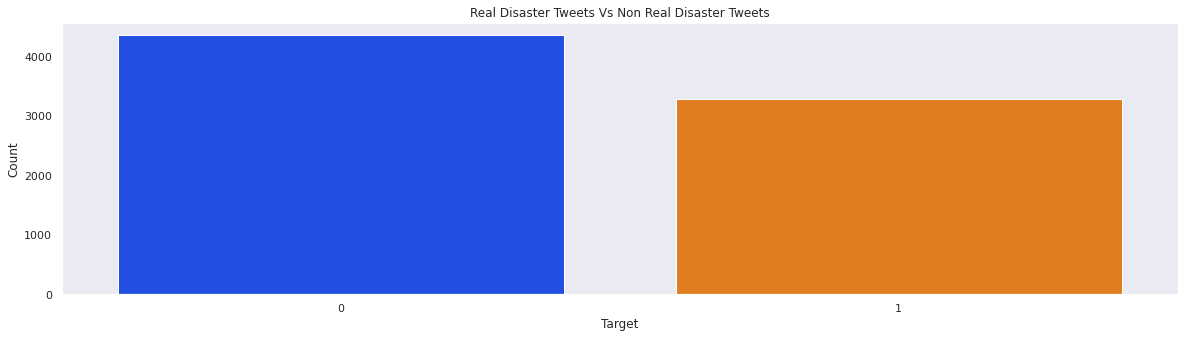

In [8]:
# Plot Count: Real Disaster Tweets Vs Non Real Disaster Tweets
sns.countplot(x='target', data=df)
plt.title('Real Disaster Tweets Vs Non Real Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

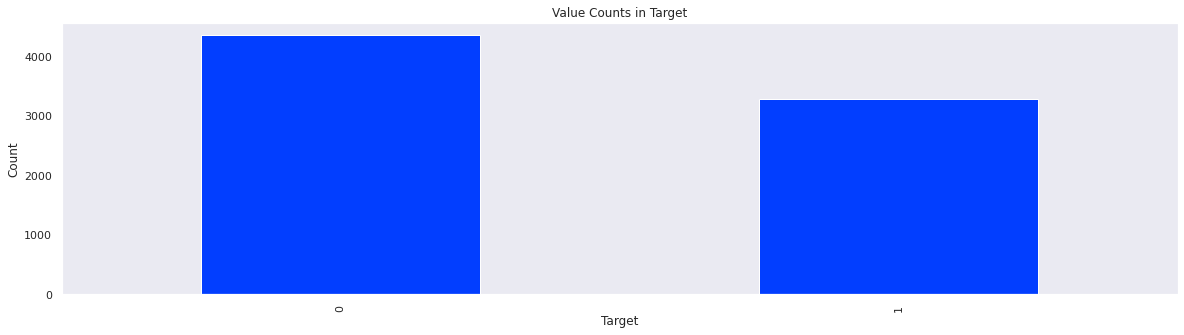

In [9]:
# Return counts of unique values within target feature.
df['target'].value_counts().plot.bar()
plt.title('Value Counts in Target')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

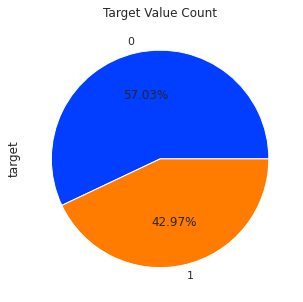

In [10]:
# Generate a pie plot for target feature.
df['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Target Value Count')
plt.show()

### Distribution in Tweets 


In [11]:
# Useful agregations from tweets 
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


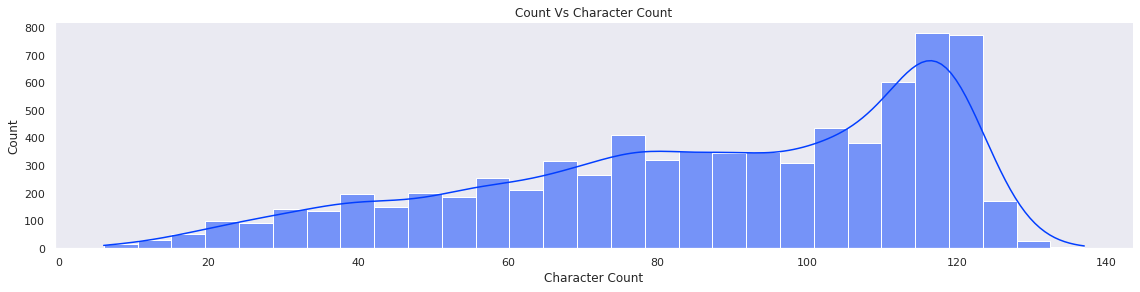

In [12]:
# Plot density distribution of a char_counts feature
sns.displot(df['char_counts'], height=4, aspect=4, kde=True)
plt.title('Count Vs Character Count')
plt.ylabel('Count')
plt.xlabel('Character Count')
plt.show()

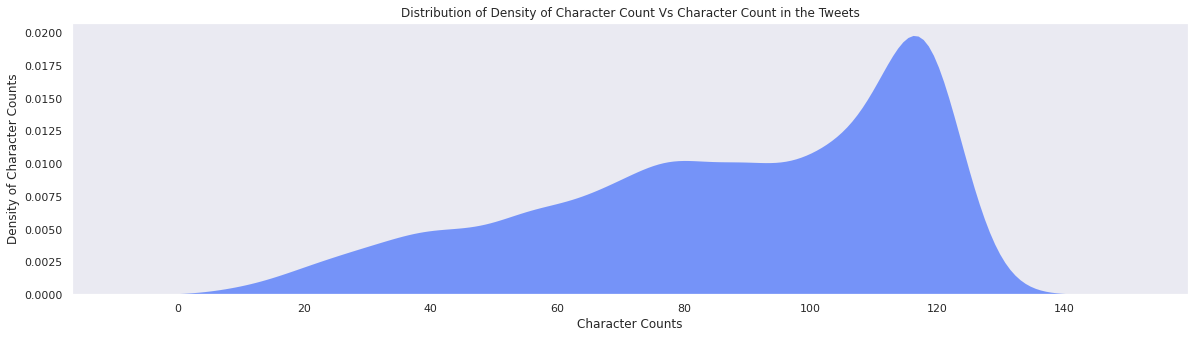

In [13]:
# Plot Kernel Density Estimate (KDE) Plot for char_counts
sns.kdeplot(df['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Density of Character Count Vs Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

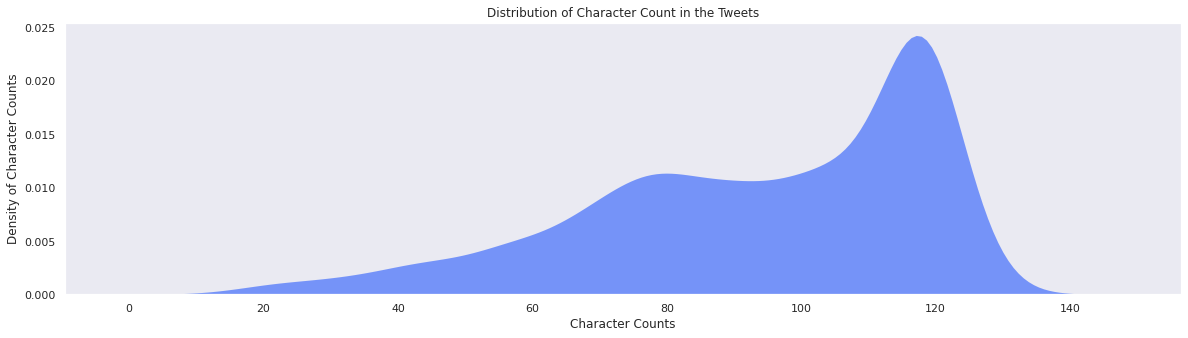

In [14]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

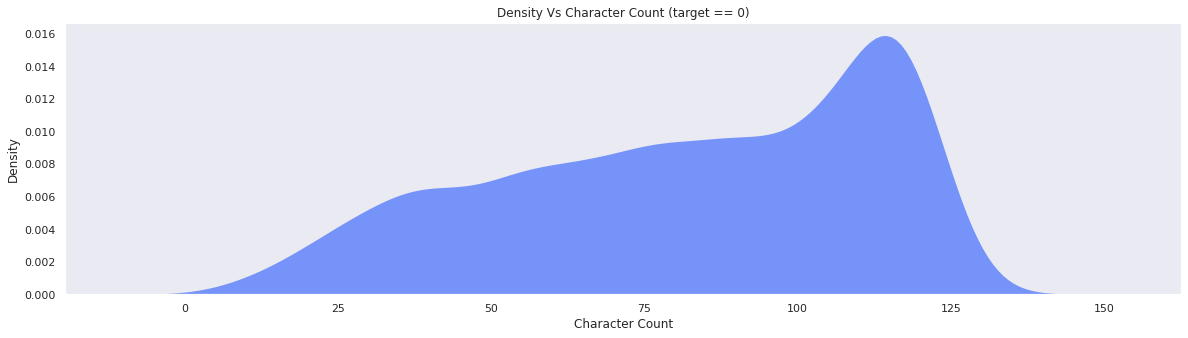

In [15]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 0
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count (target == 0)')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


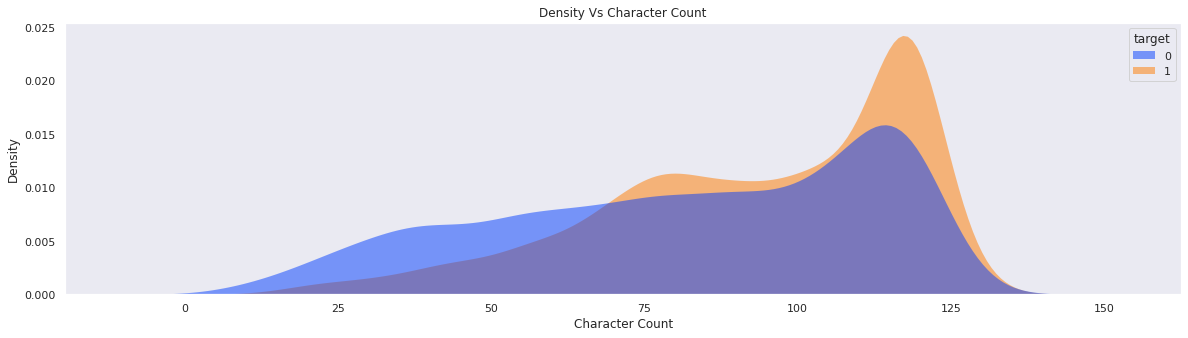

In [16]:
# Kernel Density Estimate (KDE) Plot for char_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, color='red', hue=df['target'], fill=True, alpha=.5, linewidth=0)
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, color='blue', hue=df['target'], fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

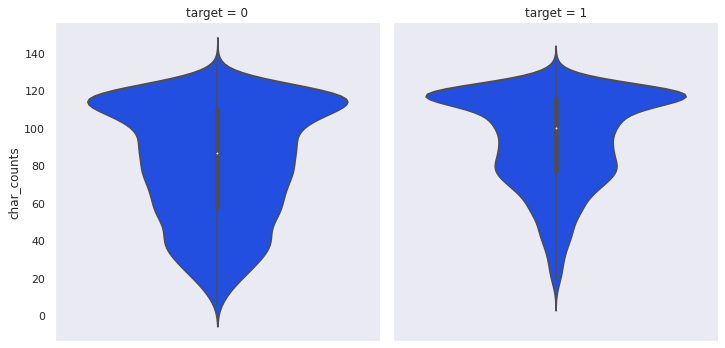

In [17]:
# Plot catplot
sns.catplot(y='char_counts', data=df, kind='violin', col='target')
plt.show()

### Number of Words, Average Words Length, and Stop Words Distribution in Tweets

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


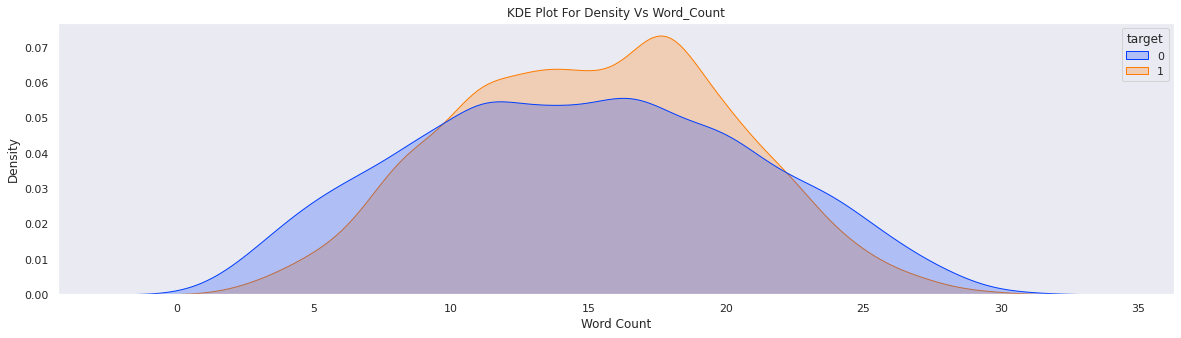

In [18]:
# Plot: Kernel Density Estimate (KDE) Plot for word_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['word_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['word_counts'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot For Density Vs Word_Count')
plt.ylabel('Density')
plt.xlabel('Word Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


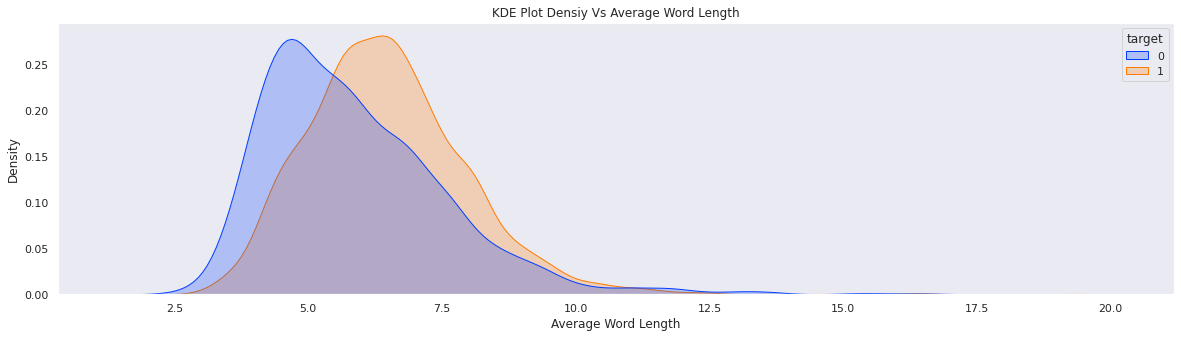

In [19]:
# Plot: Kernel Density Estimate (KDE) Plot for avg_wordlength where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['avg_wordlength'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['avg_wordlength'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot Densiy Vs Average Word Length')
plt.ylabel('Density')
plt.xlabel('Average Word Length')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


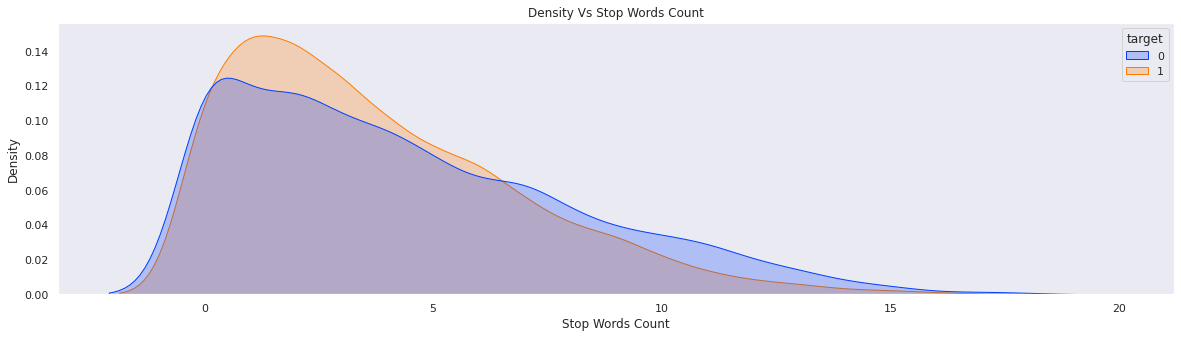

In [20]:
# PLot: Kernel Density Estimate (KDE) Plot for stopwords_counts_count where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['stopwords_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['stopwords_counts'], shade=True, color='blue', hue=df['target'])
plt.title('Density Vs Stop Words Count')
plt.ylabel('Density')
plt.xlabel('Stop Words Count')
plt.show()

### Most and the Least Common Words

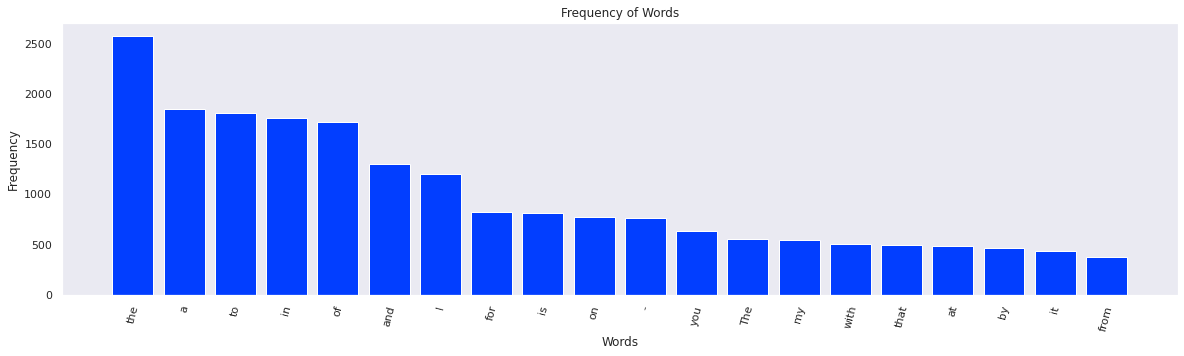

In [21]:
# frequency of Words
freqs = kgp.get_word_freqs(df=df, col='text')

# 20 Top Frequency Words
top_20_freq_words = freqs[:20]

# Plot top_20_freq_words Index Vs top_20_freq_words Values
plt.bar(top_20_freq_words.index, top_20_freq_words.values)
plt.xticks(rotation = 75)
plt.title("Frequency of Words")
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()